In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

full_data = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

full_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
clinical_trial_data.sort_values(['Mouse ID', 'Timepoint']).head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
598,a203,10,51.852437,1
758,a203,15,52.777870,1
1018,a203,20,55.173336,1


In [3]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


## Tumor Response to Treatment

In [4]:
full_data['Drug'].value_counts()


Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumorvol = full_data.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame

tumvoldf = pd.DataFrame(tumorvol.mean()).reset_index()

# Preview DataFrame

tumvoldf.head()


,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [6]:
#Checking the max timepoint:


full_data['Timepoint'].max()



45

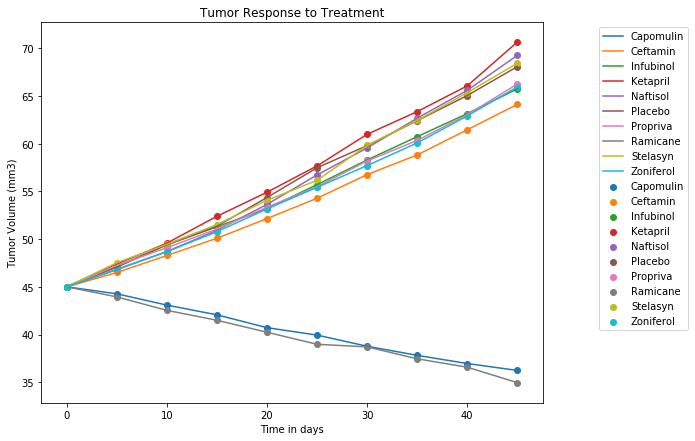

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [7]:
timepoint = np.arange(0,50,5)
druglist= list(tumvoldf['Drug'].unique())
tumvolmax = tumvoldf['Tumor Volume (mm3)'].max()
tumvolmin = tumvoldf['Tumor Volume (mm3)'].min()


vol= []
for drug in druglist:
    for i in range(len(tumvoldf)):
        if tumvoldf['Drug'][i]== drug:
            
            vol.append(tumvoldf['Tumor Volume (mm3)'][i])
    
    
#plt.axis([0,40,tumvolmin-5,tumvolmax+1])
plt.figure(figsize = (9,7))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time in days')
plt.ylabel('Tumor Volume (mm3)')

for i in range(len(druglist)):

    plt.scatter(tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Timepoint'],
             tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Tumor Volume (mm3)'],
             label = druglist[i])

    plt.plot(tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Timepoint'],
             tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Tumor Volume (mm3)'],
             label = druglist[i])

    
plt.legend(loc= 9, bbox_to_anchor=(1.2, 1), ncol=1)
plt.show()



#Note: I made this chart this way because of the simplicity of iterating through 'druglist' for the labels.

#druglist
timepoint

In [8]:
tumvoldf.loc[tumvoldf['Drug']== 'Capomulin']['Tumor Volume (mm3)']

0    45.000000
1    44.266086
2    43.084291
3    42.064317
4    40.716325
5    39.939528
6    38.769339
7    37.816839
8    36.958001
9    36.236114
Name: Tumor Volume (mm3), dtype: float64

In [9]:
list(timepoint)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [10]:
full_data.loc[(full_data['Drug'] == 'Capomulin') & (full_data['Timepoint'] == 10)]['Tumor Volume (mm3)']

570    43.270852
580    46.544292
590    37.614948
600    43.231963
610    46.154737
620    41.999228
630    35.624403
635    46.568417
645    46.425366
655    46.759074
665    46.414518
675    44.502042
685    39.005493
695    46.304003
705    41.630010
715    43.421014
725    43.688026
735    42.992077
745    39.848223
755    39.113891
765    36.825367
775    39.952347
778    46.749006
788    46.059608
792    46.408361
Name: Tumor Volume (mm3), dtype: float64

In [36]:
errorvol = tumvoldf[['Drug', 'Timepoint']]
errorvol['Std error'] = 0

timelist = list(timepoint)


# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#This is a hell of a piece of code here. You can see above how I worked it out.

#what it does is loop through both timelist, which is all of the timepoints, and druglist, which is all of the drugs. It then calculates the standard
#error for observations in full_data that have both of these criteria. Then it spits out all three as a three part tuple, composed of 
#(drug, timepoint, std error). Phew. I am very pleased with this. 5 lines!

errorlist = []    

for j in range(len(timelist)):
    for i in range(len(druglist)):
        errorlist.append((druglist[i], timelist[j],
                          pd.DataFrame.sem(full_data.loc[(full_data['Drug'] == druglist[i]) & 
                                                         (full_data['Timepoint'] == timelist[j])]['Tumor Volume (mm3)'])))

        


# I found the below code on stack overflow. We take this three-part tuple and turn it into a dictionary with a tuple for a key:

errordict = { (error, timepoint): drug for error, timepoint, drug in errorlist}

#Next we turn it into a dataframe. 
errordf = pd.Series(errordict).reset_index()
errordf.columns = ['Drug', 'Timepoint', "Std Error"]


errordf


,Drug,Timepoint,Std Error
0,Capomulin,0,0.000000
1,Ceftamin,0,0.000000
2,Infubinol,0,0.000000
3,Ketapril,0,0.000000
4,Naftisol,0,0.000000
5,Placebo,0,0.000000
6,Propriva,0,0.000000
7,Ramicane,0,0.000000
8,Stelasyn,0,0.000000
9,Zoniferol,0,0.000000


In [37]:
#We can simply sort the dataframe, so that it looks like the example. 

errordf.sort_values(['Drug', 'Timepoint'])


,Drug,Timepoint,Std Error
0,Capomulin,0,0.000000
10,Capomulin,5,0.448593
20,Capomulin,10,0.702684
30,Capomulin,15,0.838617
40,Capomulin,20,0.909731
50,Capomulin,25,0.881642
60,Capomulin,30,0.934460
70,Capomulin,35,1.052241
80,Capomulin,40,1.223608
90,Capomulin,45,1.223977


In [13]:
timepoint

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
  
    
#Next, we do standard error by timepoint :   
    
errorlist1 = []
timelist = list(timepoint)

for i in range(len(timelist)):
    errorlist1.append((timelist[i],
                      pd.DataFrame.sem(tumvoldf.loc[tumvoldf['Timepoint'] == timelist[i]]['Tumor Volume (mm3)'])))

errordict1 = dict(errorlist1)

tumvoldf['Standard Error by Timepoint'] = tumvoldf['Timepoint'].map(errordict1)


#Note: this function takes a few seconds to run, but it works.

#Note 2: I am looking at the graphs from the starter, and I see that what is desired is different from what
#the above code produces. I'll work on what is desired below, but I wanted to keep this here for posterity.

#Note 3: I am confused about the meaning of "Standard Error by Drug and Timepoint". For each drug and timepoint, we have one value. Thus, 
#the std error is zero "by drug and timepoint" (i.e. the mean minus expected for "drug and timepoint" is zero because it is one value minus itself. 
#If we mean "standard error by drug" and "standard error by timepoint", I have calculated this below.

# Convert to DataFrame

# Preview DataFrame


tumvoldf.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Standard Error by Timepoint
0,Capomulin,0,45.000000,0.000000,0.000000
1,Capomulin,5,44.266086,0.160000,0.406023
2,Capomulin,10,43.084291,0.320000,0.847590
3,Capomulin,15,42.064317,0.375000,1.267932
4,Capomulin,20,40.716325,0.652174,1.767119


In [15]:
tumvoldf

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Standard Error by Timepoint
0,Capomulin,0,45.000000,0.000000,0.000000
1,Capomulin,5,44.266086,0.160000,0.406023
2,Capomulin,10,43.084291,0.320000,0.847590
3,Capomulin,15,42.064317,0.375000,1.267932
4,Capomulin,20,40.716325,0.652174,1.767119
5,Capomulin,25,39.939528,0.818182,2.246033
6,Capomulin,30,38.769339,1.090909,2.715352
7,Capomulin,35,37.816839,1.181818,3.194941
8,Capomulin,40,36.958001,1.380952,3.671255
9,Capomulin,45,36.236114,1.476190,4.273236


In [16]:
# Minor Data Munging to Re-Format the Data Frames

tumdrugdf = pd.DataFrame(columns = list(tumvoldf['Drug'].unique()))

# Preview that Reformatting worked

tumdrugdf = tumdrugdf.append(pd.DataFrame(timepoint)).set_index(0).reset_index()

tumdrugdf

,0,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:


tumdrugdf.columns = ['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', "Placebo", 'Propriva', 'Ramicane',"Stelasyn", "Zoniferol"]


#Note: Why does the below not work? 

#tumdrugdf = tumdrugdf.rename(columns = {'0':'Timepoint'}, inplace = True)

#or

#tumdrugdf = tumdrugdf.rename({'0':'Timepoint'}, axis=1)

#Neither of these work, but documentation indicates they should work.

tumdrugdf

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
x=np.arange(0,10,1)

for i in range(len(druglist)):
   
    y = 10*i
    z = y+x
    tumdrugdf[druglist[i]]  = list(tumvoldf['Tumor Volume (mm3)'][z])
    
    #print(z)

tumdrugdf

#note: I don't like this method. I tried for almost an hour to use .loc to do something like index()match() in excel. We have two coordinates, 
#timepoint and drug. We should be able to fill a 2d plane by timepoint and drug in one function. I couldn't get it to work. I am sure there
#is a way to do this. For the above code, I took advantage of the fact that there are 10 observations for each drug, but this wasn't satisfying.

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5.0,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10.0,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15.0,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20.0,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25.0,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30.0,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35.0,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40.0,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45.0,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [19]:
#testing the above method

x=np.arange(0,10,1)

for i in range(len(druglist)):

    y = (10*i)
    print(x+y)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [20]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [21]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [24]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [25]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [27]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [28]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [29]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [30]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined